In [ ]:
import pandas as pd
import os
from scipy import stats
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
import math

#Uses dataset that was clean through Pyton and 
df_clean = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Amazon_movies_final.csv')
print(df_clean)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
        ID      MOVIE_NAME LANGUAGE  ...  YEAR_OF_RELEASE  MATURITY_RATING MINUTES
0        0      John Rambo    Tamil  ...             2008              18+    86.0
1        1    American Pie  English  ...             1999              18+    95.0
2        2       Bombshell  English  ...             2019              18+   108.0
3        3      Love Birds    Tamil  ...             1996              All   160.0
4        4           Hippi   Telugu  ...             2019              18+   140.0
...    ...             ...      ...  ...              ...              ...     ...
5752  7683      Pithamagan    Tamil  ...             2003              All   139.0
5753  7684        Mamangam    Hindi  ...             2019              13+   156.0
5754  7686  Gang Of Ghosts    Hindi  ...             2014              13+   121.0
5755  7688         Astitva  Marathi  ..

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5757 entries, 0 to 5756
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               5757 non-null   int64  
 1   MOVIE_NAME       5757 non-null   object 
 2   LANGUAGE         5757 non-null   object 
 3   IMDB_RATING      5757 non-null   float64
 4   YEAR_OF_RELEASE  5757 non-null   int64  
 5   MATURITY_RATING  5757 non-null   object 
 6   MINUTES          5743 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 315.0+ KB


In [ ]:
#Create a dataframe with maturity rating for all age groups
df_maturity_rating = df_clean[df_clean['MATURITY_RATING'] == 'All']
df_maturity_rating

,ID,MOVIE_NAME,LANGUAGE,IMDB_RATING,YEAR_OF_RELEASE,MATURITY_RATING,MINUTES
3,3,Love Birds,Tamil,5.1,1996,All,160.0
5,6,Ayyaa,Tamil,5.7,2005,All,159.0
8,10,Tum Se Achcha Kaun Hai,Hindi,4.5,2002,All,141.0
9,11,Swamy,Kannada,6.0,2005,All,154.0
10,12,Ekkees Tareekh Shubh Muhurat,Hindi,5.7,2018,All,93.0
...,...,...,...,...,...,...,...
5739,7665,Ringa Ringa,Marathi,6.8,2010,All,106.0
5743,7673,Bhargava Ramudu,Telugu,7.6,1987,All,135.0
5748,7678,Aayirappara,Malayalam,6.1,1993,All,142.0
5751,7681,Kabhi Khushi Kabhie Gham,Hindi,7.4,2001,All,209.0


In [ ]:
#counts all the movies by languages its available in 
language_df = df_clean.groupby("LANGUAGE").count()
language_df

,ID,MOVIE_NAME,IMDB_RATING,YEAR_OF_RELEASE,MATURITY_RATING,MINUTES
LANGUAGE,,,,,,
Bengali,512,512,512,512,512,511
English,1293,1293,1293,1293,1293,1291
Gujarati,73,73,73,73,73,73
Hindi,1511,1511,1511,1511,1511,1508
Kannada,250,250,250,250,250,250
Malayalam,429,429,429,429,429,429
Marathi,305,305,305,305,305,299
Punjabi,118,118,118,118,118,116
Tamil,584,584,584,584,584,584


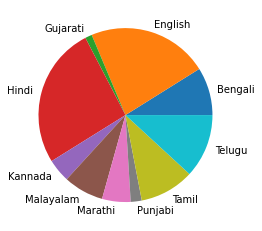

In [ ]:
#Pie chart to show the distribution of movies for each language
plt.pie(language_df["MOVIE_NAME"], labels= language_df.index)
plt.show()

In [ ]:
#Create a dataframe with only movies in English
df_english = df_clean[df_clean["LANGUAGE"] == "English"]
df_english

,ID,MOVIE_NAME,LANGUAGE,IMDB_RATING,YEAR_OF_RELEASE,MATURITY_RATING,MINUTES
1,1,American Pie,English,7.0,1999,18+,95.0
2,2,Bombshell,English,6.8,2019,18+,108.0
11,13,Sealers: One Last Hunt,English,7.7,2020,13+,56.0
12,15,Project Almanac,English,6.4,2015,13+,106.0
13,17,Ghost Stories,English,6.4,2018,18+,93.0
...,...,...,...,...,...,...,...
5725,7644,Jimmy Vestvood: Amerikan Hero,English,5.2,2016,16+,83.0
5736,7662,What's Your Number?,English,6.1,2011,18+,106.0
5738,7664,Lila & Eve,English,5.8,2015,16+,93.0
5741,7669,Lights Out,English,6.3,2016,18+,80.0


In [ ]:
#Average rating for movies in English
avg_english_rating = df_english["IMDB_RATING"].mean()
avg_english_rating

6.336194895591648

In [ ]:
#Create a dataframe with only movies in Bengali
df_bengali = df_clean[df_clean["LANGUAGE"] == "Bengali"]
df_bengali

,ID,MOVIE_NAME,LANGUAGE,IMDB_RATING,YEAR_OF_RELEASE,MATURITY_RATING,MINUTES
36,49,Teen Cup Chaa,Bengali,5.7,2018,13+,47.0
40,56,Dash Mash Dash Diner Galpo,Bengali,5.7,2019,All,114.0
67,99,Baba Taraknath,Bengali,5.5,1977,All,150.0
68,100,Rajlakshmi O Srikanta,Bengali,6.2,2017,13+,132.0
90,133,Autograph,Bengali,7.4,2017,13+,132.0
...,...,...,...,...,...,...,...
5726,7645,Agni Kanya,Bengali,7.4,1990,NR,115.0
5734,7659,Baghini,Bengali,7.7,2017,13+,143.0
5744,7674,Shob Charitro Kalponik,Bengali,6.8,2018,13+,97.0
5746,7676,Sultan - The Saviour,Bengali,5.5,2018,13+,160.0


In [ ]:
#Average rating for movies in Bengali
avg_bengali_rating = df_bengali["IMDB_RATING"].mean()
avg_bengali_rating

6.5294921875

In [ ]:
#Create a dataframe with only movies in Telugu
df_telugu = df_clean[df_clean["LANGUAGE"] == "Telugu"]
df_telugu

,ID,MOVIE_NAME,LANGUAGE,IMDB_RATING,YEAR_OF_RELEASE,MATURITY_RATING,MINUTES
4,4,Hippi,Telugu,5.0,2019,18+,140.0
24,33,Sketch,Telugu,5.7,2018,13+,133.0
69,101,Surya IPS,Telugu,6.9,1991,NR,143.0
75,109,Universal Soldier: Day of Reckoning,Telugu,5.0,2012,18+,105.0
78,113,Dare,Telugu,5.8,2011,NR,145.0
...,...,...,...,...,...,...,...
5724,7643,Ashoka Chakravarthy,Telugu,5.7,1989,NR,153.0
5728,7647,Kundanapu Bomma,Telugu,5.3,2016,All,121.0
5743,7673,Bhargava Ramudu,Telugu,7.6,1987,All,135.0
5749,7679,Mangala Gowri,Telugu,1.9,1980,NR,120.0


In [ ]:
#Average rating for movies in Telugu
avg_telugu_rating = df_telugu["IMDB_RATING"].mean()
avg_telugu_rating

6.260557184750733

In [ ]:
#Create a dataframe with only movies in Hindi
df_hindi = df_clean[df_clean["LANGUAGE"] == "Hindi"]
df_hindi

,ID,MOVIE_NAME,LANGUAGE,IMDB_RATING,YEAR_OF_RELEASE,MATURITY_RATING,MINUTES
8,10,Tum Se Achcha Kaun Hai,Hindi,4.5,2002,All,141.0
10,12,Ekkees Tareekh Shubh Muhurat,Hindi,5.7,2018,All,93.0
14,19,Jaani Dushman: Ek Anokhi Kahani,Hindi,2.8,2002,13+,152.0
20,27,Uss Din,Hindi,7.4,2010,18+,11.0
22,31,Kanhaiya Ek Yodha (Hindi),Hindi,4.7,2019,13+,116.0
...,...,...,...,...,...,...,...
5737,7663,Nauker,Hindi,6.5,1979,All,122.0
5745,7675,Befikre,Hindi,3.9,2016,16+,130.0
5751,7681,Kabhi Khushi Kabhie Gham,Hindi,7.4,2001,All,209.0
5753,7684,Mamangam,Hindi,6.4,2019,13+,156.0


In [ ]:
#Average rating for movies in Hindi
avg_hindi_rating = df_hindi["IMDB_RATING"].mean()
avg_hindi_rating

5.948775645268032

In [ ]:
#Create a dataframe with only movies in Tamil
df_tamil = df_clean[df_clean["LANGUAGE"] == "Tamil"]
df_tamil

,ID,MOVIE_NAME,LANGUAGE,IMDB_RATING,YEAR_OF_RELEASE,MATURITY_RATING,MINUTES
0,0,John Rambo,Tamil,7.0,2008,18+,86.0
3,3,Love Birds,Tamil,5.1,1996,All,160.0
5,6,Ayyaa,Tamil,5.7,2005,All,159.0
17,24,300: Rise of an Empire,Tamil,6.2,2014,18+,102.0
32,44,Law Abiding Citizen,Tamil,7.4,2009,18+,104.0
...,...,...,...,...,...,...,...
5716,7632,Kannan Varuvaan,Tamil,6.0,2000,All,136.0
5730,7650,Thanimai,Tamil,4.4,2019,All,127.0
5740,7668,Chellamae,Tamil,6.2,2004,18+,155.0
5752,7683,Pithamagan,Tamil,8.3,2003,All,139.0


In [ ]:
#Average rating for movies in Tamil
avg_tamil_rating = df_tamil["IMDB_RATING"].mean()
avg_tamil_rating

6.230993150684935

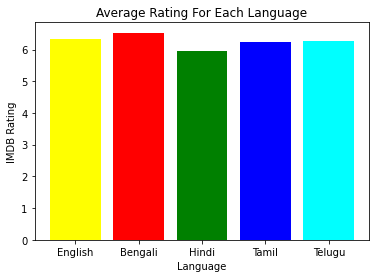

In [ ]:
#Bar Chart showing IMDB Rating for movies in each language
avg_rating = [avg_english_rating, avg_bengali_rating, avg_hindi_rating, avg_tamil_rating, avg_telugu_rating]
avg_language = ["English", "Bengali", "Hindi", "Tamil", "Telugu"]

plt.bar(avg_language, avg_rating, color=['yellow', 'red', 'green', 'blue', 'cyan'])
plt.xlabel("Language")
plt.ylabel("IMDB Rating")
plt.title("Average Rating For Each Language")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


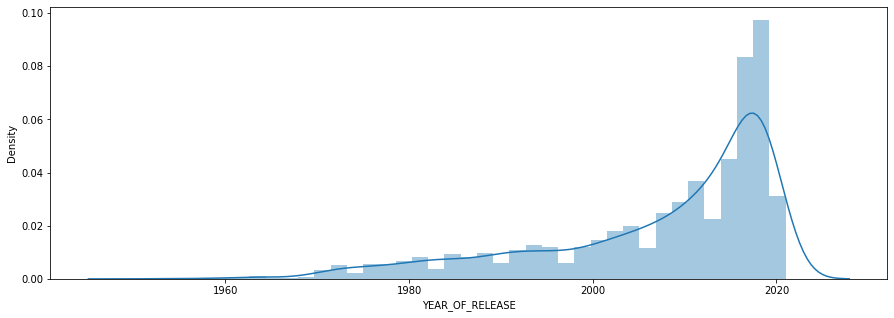

In [ ]:
#Distribution chart shows that there are more Amazon Prime movies made in recent years as opposed to early years
plt.figure(figsize = (15,5))
ax = sns.distplot(df_clean['YEAR_OF_RELEASE'])

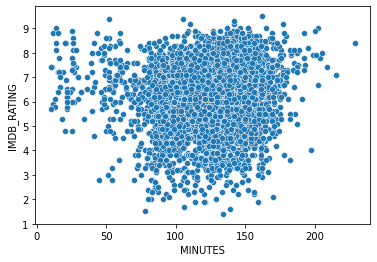

In [ ]:
sns.scatterplot(x="MINUTES", y="IMDB_RATING", data=df_clean)
# Scatterplot has no linearity. No correlation between movie length and IMDb Rating. Movie length does not affect the whether or not a movies is highly rated.

In [ ]:
#Do movies have higher ratings when they are longer, or do they have higher ratings when they are shorter?
#Is there a statistically significant difference in ratings between films longer than 100 minutes and shorter than 100 minutes
#Ho: There is no difference in ratings for films longer and shorter than 100 minutes
#Ha: There is a statistical difference in rating between longer and shorter films.

long_films = df_clean.iloc[(df_clean['MINUTES'] <= 100).values]
short_films = df_clean.iloc[(df_clean['MINUTES'] > 100).values]

stats.ttest_ind(long_films['IMDB_RATING'], short_films['IMDB_RATING'])

Ttest_indResult(statistic=-9.980062713685909, pvalue=2.8808347617542417e-23)

In [ ]:
#P-value < alpha at 0.05. Significant evidence to reject Ho.
#There is a difference in film ratings between longer and shorter films
#Which has the higher ratings?
df_long_film = df_clean[df_clean["MINUTES"] >= 100]
df_long_film
avg_long_film = df_long_film["IMDB_RATING"].mean()
avg_long_film


6.331042917500562

In [ ]:
df_short_film = df_clean[df_clean["MINUTES"] < 100]
df_short_film
avg_short_film = df_short_film["IMDB_RATING"].mean()
avg_short_film
#Movies that are 100 minutes or longer has statistically higher ratings than movies less than 100 minutes

5.917174959871591

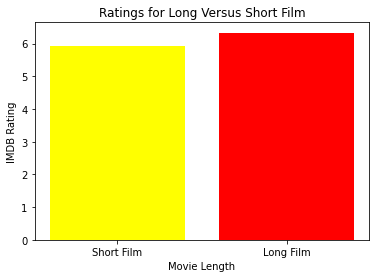

In [ ]:
x_axis = ["Short Film", "Long Film"]
y_axis = [avg_short_film, avg_long_film ]
plt.bar(x_axis, y_axis, color=['yellow', 'red'])
plt.xlabel("Movie Length")
plt.ylabel("IMDB Rating")
plt.title("Ratings for Long Versus Short Film")

plt.show()

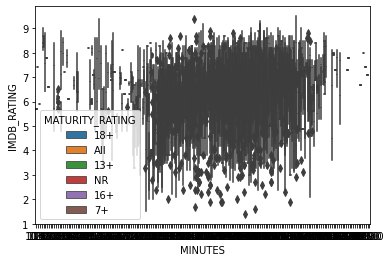

In [ ]:
sns.boxplot(y="IMDB_RATING", hue="MATURITY_RATING", x="MINUTES", data=df_clean)